## Predicting Problem Mortgage Loans
By: Magali Solimano  
Date: December 2022

## Import Libraries and Load Data


In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Data visualization
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter

#from kneed import KneeLocator
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.ensemble import RUSBoostClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, auc, average_precision_score, 
                             confusion_matrix, plot_confusion_matrix, 
                             ConfusionMatrixDisplay, classification_report,
                             precision_recall_curve)
from sklearn.linear_model import LogisticRegression
import six
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.model_selection import GridSearchCV

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import data
data = pd.read_csv('2021Q1.csv',sep="|", header=None)

In [4]:
# View shape of dataframe
data.shape

(23104273, 108)

- Dataset is very large, with 23 million rows and 108 columns.

In [5]:
# Define column names and rename columns
column_names = [
    'reference_pool_id',
    'loan_id',
    'monthly_reporting_pd',
    'channel',
    'seller_name',
    'servicer_name',
    'master_servicer',
    'original_interest_rate',
    'current_interest_rate',
    'original_UPB',
    'UPB_at_issuance',
    'current_actual_UPB',
    'original_loan_term',
    'origination_date',
    'first_payment_date',
    'loan_age_months',
    'months_to_legal_maturity',
    'months_to_maturity',
    'maturity_date',
    'original_ltv',
    'original_combined_ltv',
    'number_of_borrowers',
    'debt_to_income',
    'borrower_credit_score_origination',
    'co-borrower_credit_score_origination',
    'first_time_homebuyer',
    'loan_purpose',
    'property_type',
    'number_of_units',
    'occupancy_status',
    'property_state',
    'metropolitan_statistical_area',
    'zipcode_short',
    'mortgage_insurance_pct',
    'amortization_type',
    'prepayment_penalty_indicator',
    'interest_only_loan_indicator',
    'interest_only_first_principal_int_payment_date',
    'months_to_amortization',
    'loan_delinquency_months',
    'loan_payment_history',
    'modification_flag',
    'mortgage_insurance_cancellation_indicator',
    'zero_balance_code',
    'zero_balance_effective_date',
    'upb_at_time_of_removal',
    'repurchase_date',
    'scheduled_principal_current',
    'total_principal_current',
    'unscheduled_principal_current',
    'last_paid_installment_date',
    'foreclosure_date',
    'disposition_date',
    'foreclosure_costs',
    'property_preservation_repair_costs',
    'asset_recovery_costs',
    'misc_holding_expenses_and_credits',
    'associated_taxes_for_holding_property',
    'net_sales_proceeds',
    'credit_enhancement_proceeds',
    'repurchase_make_whole_proceeds',
    'other_foreclosure_proceeds',
    'non_interest_bearing_upb',
    'principal_forgiveness_amount',
    'original_list_start_date',
    'original_list_price',
    'current_list_start_date',
    'current_list_price',
    'borrower_credit_score_issuance',
    'co-borrower_credit_score_issuance',
    'borrower_credit_score_current',
    'co-borrower_credit_score_current',
    'mortgage_insurance_type',
    'servicing_activity_indicator',
    'current_period_modification_loss_ammount',
    'cumulative_modification_loss_amount',
    'current_period_credit_event_net_gainloss',
    'cumulative_credit_event_net_gainloss',
    'special_eligibility_program',
    'foreclosure_principal_writeoff_amt',
    'relocation_mortgage_indicator',
    'zero_balance_code_change_date',
    'loan_holdback_indicator',
    'loan_holdback_effective_date',
    'delinquent_accrued_interest',
    'property_valuation_method',
    'high_balance_loan_indicator',
    'arm_initial_fixedrate_period_lessthan5yr_indicator',
    'arm_product_type',
    'initial_fixed_rate_period',
    'interest_rate_adj_frequency',
    'next_interest_rate_adj_date',
    'next_payment_change_date',
    'index',
    'arm_cap_structure',
    'initial_interest_rate_capup_pct',
    'periodic_interest_rate_capup_pct',
    'lifetime_interest_rate_capup_pct',
    'mortgage_margin',
    'arm_balloon_indicator',
    'arm_plan_number',
    'borrower_assistance_plan',
    'high_ltv_refinance_option_indicator',
    'deal_name',
    'repurchase_make_whole_proceeds_flag',
    'alternative_delinquency_resolution',
    'alternative_delinquency_resolution_count',
    'total_deferral_amount'] 

data.columns = column_names

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23104273 entries, 0 to 23104272
Columns: 108 entries, reference_pool_id to total_deferral_amount
dtypes: float64(75), int64(11), object(22)
memory usage: 18.6+ GB


- Several variables have dtypes that should be changed to string (zipcode and msa)  
and datetime (eg, date-related variable such as foreclosure date).

In [7]:
# View df with new column names
data.head()

,reference_pool_id,loan_id,monthly_reporting_pd,channel,seller_name,servicer_name,master_servicer,original_interest_rate,current_interest_rate,original_UPB,...,mortgage_margin,arm_balloon_indicator,arm_plan_number,borrower_assistance_plan,high_ltv_refinance_option_indicator,deal_name,repurchase_make_whole_proceeds_flag,alternative_delinquency_resolution,alternative_delinquency_resolution_count,total_deferral_amount
0,NaN,122128311,12021,R,"loanDepot.com, LLC","loanDepot.com, LLC",NaN,2.125,2.125,619000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
1,NaN,122128311,22021,R,"loanDepot.com, LLC","loanDepot.com, LLC",NaN,2.125,2.125,619000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
2,NaN,122128311,32021,R,"loanDepot.com, LLC","loanDepot.com, LLC",NaN,2.125,2.125,619000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
3,NaN,122128311,42021,R,"loanDepot.com, LLC","loanDepot.com, LLC",NaN,2.125,2.125,619000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN
4,NaN,122128311,52021,R,"loanDepot.com, LLC","loanDepot.com, LLC",NaN,2.125,2.125,619000.0,...,NaN,NaN,NaN,7,N,NaN,NaN,7,NaN,NaN


In [8]:
# View df's descriptive statistics
data.describe()

,reference_pool_id,loan_id,monthly_reporting_pd,master_servicer,original_interest_rate,current_interest_rate,original_UPB,UPB_at_issuance,current_actual_UPB,original_loan_term,...,arm_cap_structure,initial_interest_rate_capup_pct,periodic_interest_rate_capup_pct,lifetime_interest_rate_capup_pct,mortgage_margin,arm_balloon_indicator,arm_plan_number,deal_name,alternative_delinquency_resolution_count,total_deferral_amount
count,0.0,2.310427e+07,2.310427e+07,0.0,2.310427e+07,2.297653e+07,2.310427e+07,0.0,2.310427e+07,2.310427e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13096.000000,13096.000000
mean,NaN,1.228179e+08,5.968742e+04,NaN,2.787136e+00,2.786576e+00,2.822724e+05,NaN,2.736624e+05,3.147012e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.019166,9074.492603
std,NaN,4.080091e+05,3.227374e+04,NaN,3.585050e-01,3.581182e-01,1.451962e+05,NaN,1.441662e+05,7.629344e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.145753,7804.493354
min,NaN,1.221283e+08,1.202100e+04,NaN,1.500000e+00,1.500000e+00,1.500000e+04,NaN,0.000000e+00,8.500000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,551.490000
25%,NaN,1.224628e+08,3.202200e+04,NaN,2.625000e+00,2.625000e+00,1.730000e+05,NaN,1.660000e+05,2.400000e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,3778.740000
50%,NaN,1.228084e+08,5.202200e+04,NaN,2.750000e+00,2.750000e+00,2.530000e+05,NaN,2.460000e+05,3.600000e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,6556.960000
75%,NaN,1.231696e+08,8.202100e+04,NaN,2.990000e+00,2.990000e+00,3.650000e+05,NaN,3.560000e+05,3.600000e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,11693.145000
max,NaN,1.235417e+08,1.220210e+05,NaN,5.875000e+00,5.875000e+00,1.582000e+06,NaN,1.582000e+06,3.600000e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,67940.680000


- Several columns have missing values to examine.

## Pre-processing Data

In [9]:
# Drop reference_id, loan_id, date columns, geography-related columns (zipcode  
# and msa), loan_age_months, which are not loan characteristics  
# that will inform this analysis
# For now, keep origination_date and foreclosure_date for feature engineering
data.drop(['reference_pool_id', 'loan_id', 'monthly_reporting_pd', 
           'first_payment_date', 'disposition_date', 'maturity_date',
           'zipcode_short', 'metropolitan_statistical_area', 'property_state',
           'loan_age_months'], axis = 1, inplace = True)

### Change data types

In [10]:
# Convert origination_date and foreclosure_date column to datetime with format mm/dd/yy
data['origination_date'] = pd.to_datetime(data['foreclosure_date'], format='%m%d%y')
data['foreclosure_date'] = pd.to_datetime(data['foreclosure_date'], format='%m%d%y')

### Null values

In [11]:
# Drop columns that have all NaNs
data = data.dropna(how='all', axis=1)
data.head()

,channel,seller_name,servicer_name,original_interest_rate,current_interest_rate,original_UPB,current_actual_UPB,original_loan_term,origination_date,months_to_legal_maturity,...,foreclosure_principal_writeoff_amt,relocation_mortgage_indicator,property_valuation_method,high_balance_loan_indicator,borrower_assistance_plan,high_ltv_refinance_option_indicator,repurchase_make_whole_proceeds_flag,alternative_delinquency_resolution,alternative_delinquency_resolution_count,total_deferral_amount
0,R,"loanDepot.com, LLC","loanDepot.com, LLC",2.125,2.125,619000.0,616000.0,180,NaT,180.0,...,NaN,N,W,Y,7,N,NaN,7,NaN,NaN
1,R,"loanDepot.com, LLC","loanDepot.com, LLC",2.125,2.125,619000.0,613000.0,180,NaT,179.0,...,NaN,N,W,Y,7,N,NaN,7,NaN,NaN
2,R,"loanDepot.com, LLC","loanDepot.com, LLC",2.125,2.125,619000.0,610000.0,180,NaT,178.0,...,NaN,N,W,Y,7,N,NaN,7,NaN,NaN
3,R,"loanDepot.com, LLC","loanDepot.com, LLC",2.125,2.125,619000.0,607000.0,180,NaT,177.0,...,NaN,N,W,Y,7,N,NaN,7,NaN,NaN
4,R,"loanDepot.com, LLC","loanDepot.com, LLC",2.125,2.125,619000.0,604000.0,180,NaT,176.0,...,NaN,N,W,Y,7,N,NaN,7,NaN,NaN


In [12]:
# Check for null values
print(data.isnull().sum())

channel                                            0
seller_name                                        0
servicer_name                                 127751
original_interest_rate                             0
current_interest_rate                         127741
original_UPB                                       0
current_actual_UPB                                 0
original_loan_term                                 0
origination_date                            23104263
months_to_legal_maturity                      127751
months_to_maturity                            127902
original_ltv                                       0
original_combined_ltv                              0
number_of_borrowers                                0
debt_to_income                                   558
borrower_credit_score_origination               6380
co-borrower_credit_score_origination        12212372
first_time_homebuyer                               0
loan_purpose                                  

- Several columns still have a significant amount of missing data. Based on the similar counts of missing  
data, it appears that there are records that have missing values for several columns. This means that we  
can explore dropping columns with large counts of missing values.

In [13]:
# Examine mortgage insurance type, which has high number of null values
data['mortgage_insurance_type'].value_counts(dropna=False)

NaN    18999872
1.0     4050099
2.0       43908
3.0       10394
Name: mortgage_insurance_type, dtype: int64

In [14]:
# For mortgage_insurance_type, fill NaN with '4' to represent 'no mortgage insurance'
data['mortgage_insurance_type'].fillna('4', inplace=True)
data['mortgage_insurance_type'].replace({1.0: 1, 2.0: 2, 3.0: 3}, inplace=True)
# View value counts
data['mortgage_insurance_type'].value_counts()

4    18999872
1     4050099
2       43908
3       10394
Name: mortgage_insurance_type, dtype: int64

In [15]:
# Examine co-borrower credit scores, which has high number of null values, 
# possibly indicating that there is no co-borrower
data['co-borrower_credit_score_origination'].value_counts(dropna = False)

NaN      12212372
809.0      226704
801.0      224981
808.0      197816
804.0      182465
           ...   
839.0          71
833.0          34
840.0          18
841.0          17
835.0          16
Name: co-borrower_credit_score_origination, Length: 220, dtype: int64

In [16]:
# Create co-borrower binary variable to indicate if there is co-borrower or not
data['co-borrower_status'] = np.where(data['co-borrower_credit_score_origination'].isnull(), 0, 1)
# Set data type to object
data['co-borrower_status'] = data['co-borrower_status'].astype(int)
data['co-borrower_status'].value_counts(dropna=False)

0    12212372
1    10891901
Name: co-borrower_status, dtype: int64

In [17]:
data['principal_forgiveness_amount'].value_counts(dropna = False)

NaN    23090902
0.0       13371
Name: principal_forgiveness_amount, dtype: int64

- principal forgiveness amount variable provides future information that will not  
assist with predicting problem loans

In [18]:
data['foreclosure_principal_writeoff_amt'].value_counts(dropna=False)

NaN    23090902
0.0       13371
Name: foreclosure_principal_writeoff_amt, dtype: int64

- foreclosure principal writeoff amount variable provides future information that will not  
assist with predicting problem loans

In [19]:
# Drop columns where more than 50% of values are missing
# Keep foreclosure date for later use in calculation of problem loans 
data.drop(['co-borrower_credit_score_origination', 'mortgage_insurance_pct',
          'zero_balance_code', 'zero_balance_effective_date',
          'upb_at_time_of_removal', 'last_paid_installment_date',
          'total_principal_current', 
           'non_interest_bearing_upb', 'principal_forgiveness_amount',
           'foreclosure_principal_writeoff_amt', 
          'repurchase_make_whole_proceeds_flag', 
          'alternative_delinquency_resolution_count', 
          'total_deferral_amount'], axis = 1, inplace=True)

In [20]:
data.isnull().sum()

channel                                       0
seller_name                                   0
servicer_name                            127751
original_interest_rate                        0
current_interest_rate                    127741
original_UPB                                  0
current_actual_UPB                            0
original_loan_term                            0
origination_date                       23104263
months_to_legal_maturity                 127751
months_to_maturity                       127902
original_ltv                                  0
original_combined_ltv                         0
number_of_borrowers                           0
debt_to_income                              558
borrower_credit_score_origination          6380
first_time_homebuyer                          0
loan_purpose                                  0
property_type                                 0
number_of_units                               0
occupancy_status                        

In [21]:
# Fill na with mean for variables: debt_to_income, borrower_credit_score_origination, 
# months_to_maturity
data['debt_to_income'].fillna(data['debt_to_income'].mean(), inplace=True)
data['borrower_credit_score_origination'].fillna(
    data['borrower_credit_score_origination'].mean(), inplace=True)
data['months_to_maturity'].fillna(data['months_to_maturity'].mean(), inplace=True)

In [22]:
data['foreclosure_date'].value_counts()

2022-05-20    2
2021-12-20    2
2022-06-20    1
2021-06-20    1
2022-04-20    1
2022-01-20    1
2022-03-20    1
2022-02-20    1
Name: foreclosure_date, dtype: int64

- Only a handfull of records have foreclosed

In [23]:
# instantiate label encoder
label_enc = LabelEncoder()

In [24]:
# Create new, binary variable that indicates foreclosure status (0: no, 1: yes)
data['foreclosure_status'] = np.where(data['foreclosure_date'].isnull(), 0, 1)
# Apply label encoding
data['foreclosure_status'] = label_enc.fit_transform(data['foreclosure_status'].astype(str))
data['foreclosure_status'].value_counts(dropna=False)

0    23104263
1          10
Name: foreclosure_status, dtype: int64

In [25]:
# Drop foreclosure date, which has mostly missing values
data.drop(['foreclosure_date'], axis=1, inplace=True)

In [26]:
# Examine missing values for servicer_name variable
data[data['servicer_name'].isna()]

,channel,seller_name,servicer_name,original_interest_rate,current_interest_rate,original_UPB,current_actual_UPB,original_loan_term,origination_date,months_to_legal_maturity,...,servicing_activity_indicator,special_eligibility_program,relocation_mortgage_indicator,property_valuation_method,high_balance_loan_indicator,borrower_assistance_plan,high_ltv_refinance_option_indicator,alternative_delinquency_resolution,co-borrower_status,foreclosure_status
45,R,Other,NaN,2.625,NaN,589000.0,0.0,180,NaT,NaN,...,NaN,N,N,W,Y,7,N,7,1,0
177,B,"Rocket Mortgage, LLC",NaN,2.875,NaN,765000.0,0.0,360,NaT,NaN,...,NaN,N,N,A,Y,7,N,7,1,0
195,C,PennyMac Corp.,NaN,2.875,NaN,715000.0,0.0,360,NaT,NaN,...,NaN,N,N,A,Y,7,N,7,0,0
478,B,"United Wholesale Mortgage, LLC",NaN,3.250,NaN,628000.0,0.0,360,NaT,NaN,...,NaN,N,N,A,Y,7,N,7,1,0
740,C,PennyMac Corp.,NaN,2.250,NaN,611000.0,0.0,180,NaT,NaN,...,NaN,N,N,A,Y,7,N,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23102680,R,"CrossCountry Mortgage, LLC",NaN,3.375,NaN,152000.0,0.0,360,NaT,NaN,...,NaN,N,N,A,N,7,N,7,0,0
23103098,R,Other,NaN,2.625,NaN,315000.0,0.0,360,NaT,NaN,...,NaN,N,N,A,N,7,N,7,0,0
23103169,R,Other,NaN,2.875,NaN,369000.0,0.0,360,NaT,NaN,...,NaN,N,N,A,N,7,N,7,0,0
23103985,R,"Rocket Mortgage, LLC",NaN,2.750,NaN,315000.0,0.0,360,NaT,NaN,...,NaN,N,N,W,N,7,N,7,0,0


In [27]:
# drop rows with NaN in servicer name col, which will also drop NaNs in other columns
data = data.dropna(subset=['servicer_name'])

In [28]:
# Recheck for missing values
data.isnull().sum()

channel                                       0
seller_name                                   0
servicer_name                                 0
original_interest_rate                        0
current_interest_rate                         0
original_UPB                                  0
current_actual_UPB                            0
original_loan_term                            0
origination_date                       22976522
months_to_legal_maturity                      0
months_to_maturity                            0
original_ltv                                  0
original_combined_ltv                         0
number_of_borrowers                           0
debt_to_income                                0
borrower_credit_score_origination             0
first_time_homebuyer                          0
loan_purpose                                  0
property_type                                 0
number_of_units                               0
occupancy_status                        

- Missing values have been addressed.

In [29]:
# Examine shape of dataframe after removing missing values
data.shape

(22976522, 38)

In [30]:
# Calculate how much data was dropped
# Rows dropped
print('Rows: ', round(100 * ((22976522 - 23104273) / 23104273), 2), '%')

Rows:  -0.55 %


- Dataframe has been cleaned with minimal impact of size of dataset, as 0.55% of records were dropped.
- Number of columns has been reduced to 37 from 86.

### Data labels

In [31]:
# Apply binary label encoding to y/n variables
# relabel y/n columns to binary (0,1) and change dtype to integer
data['first_time_homebuyer'].replace({'N':0, 'Y':1}, inplace=True)
data['prepayment_penalty_indicator'].replace({'N':0, 'Y':1}, inplace=True)
data['interest_only_loan_indicator'].replace({'N':0, 'Y':1}, inplace=True)
data['servicing_activity_indicator'].replace({'N':0, 'Y':1}, inplace=True)
data['relocation_mortgage_indicator'].replace({'N':0, 'Y':1}, inplace=True)
data['high_balance_loan_indicator'].replace({'N':0, 'Y':1}, inplace=True)
data['high_ltv_refinance_option_indicator'].replace({'N':0, 'Y':1}, inplace=True)
data['modification_flag'].replace({'N':0, 'Y':1}, inplace=True)
data['special_eligibility_program'].replace({'N':0, 'Y':1}, inplace=True)

# apply label encoding for binary classification
data['first_time_homebuyer'] = label_enc.fit_transform(data['first_time_homebuyer'].astype(str))
data['prepayment_penalty_indicator'] = label_enc.fit_transform(data['modification_flag'].astype(str))
data['interest_only_loan_indicator'] = label_enc.fit_transform(data['modification_flag'].astype(str))
data['servicing_activity_indicator'] = label_enc.fit_transform(data['modification_flag'].astype(str))
data['relocation_mortgage_indicator'] = label_enc.fit_transform(data['modification_flag'].astype(str))
data['high_balance_loan_indicator'] = label_enc.fit_transform(data['modification_flag'].astype(str))
data['high_ltv_refinance_option_indicator'] = label_enc.fit_transform(data['modification_flag'].astype(str))
data['modification_flag'] = label_enc.fit_transform(data['modification_flag'].astype(str))
data['special_eligibility_program'] = label_enc.fit_transform(data['special_eligibility_program'].astype(str))

In [32]:
# Examine value counts for borrower_assistance_plan
data['borrower_assistance_plan'].value_counts()

7    22800698
N      130416
F       43091
T        1821
R         496
Name: borrower_assistance_plan, dtype: int64

In [33]:
# Create new variable 'borrower_assistance_plan' to indicate if borrower is on assistance plan
# Change labels for borrower assistance plan (binary: 0 for no assistance, 1 for assistance)
def borrower_assistance_labels(x):
    if   x == 'F':   return 1 #forbearance
    elif x == 'R':   return 1 #repayment
    elif x == 'T': return 1   #trial period
    elif x == 'O': return 1   #other
    else: return 0

func = np.vectorize(borrower_assistance_labels)
borrower_assistance_class = func(data['borrower_assistance_plan'])

data['borrower_assistance_status'] = borrower_assistance_class
data['borrower_assistance_status'] = label_enc.fit_transform(data['borrower_assistance_status'].astype(str))

In [34]:
data['borrower_assistance_status'].value_counts()

0    22931114
1       45408
Name: borrower_assistance_status, dtype: int64

In [35]:
# Change labels for borrower assistance plan
borrower_assistance_plan_labels = {'F': 'forbearance',
                                 'R': 'repayment',
                                 'T': 'trial_period',
                                 'O': 'other',
                                 'N': 'none',
                                 '7': 'not_applicable',
                                 '9': 'not_available'}

data['borrower_assistance_plan'].replace(borrower_assistance_plan_labels, inplace=True)
data['borrower_assistance_plan'] = data['borrower_assistance_plan'].astype(str)

In [36]:
# change labels for mortgage_insurance_type
mortgage_insurance_type_labels = {1: 'borrower_paid',
                                  2: 'lender_paid',
                                  3: 'enterprise_paid',
                                  4: 'none'}

data['mortgage_insurance_type'].replace(mortgage_insurance_type_labels, inplace=True)
data['mortgage_insurance_type'] = data['mortgage_insurance_type'].astype(str)

In [37]:
data['alternative_delinquency_resolution'].value_counts()

7    13692024
7     9271402
C       12953
D         134
P           9
Name: alternative_delinquency_resolution, dtype: int64

In [40]:
# change labels for alternative_delinquency_resolution
alternative_delinquency_resolution_labels = {'P': 'payment_deferral',
                                 'C': 'covid19',
                                 'D': 'natural_disaster',
                                 '7': 'not_applicable',
                                  7: 'not_applicable',           
                                 '9': 'not_available'}
data['alternative_delinquency_resolution'].replace(alternative_delinquency_resolution_labels, inplace=True)
data['alternative_delinquency_resolution'] = data['alternative_delinquency_resolution'].astype(str)

In [41]:
data['alternative_delinquency_resolution'].value_counts()

not_applicable      22963426
covid19                12953
natural_disaster         134
payment_deferral           9
Name: alternative_delinquency_resolution, dtype: int64

### Feature engineering

In [42]:
# Define target variable: problem loans
# Labels for problem loans (0 for no problems; 1 for problems repaying, 
#                            modified loans, borrower assistance, foreclosures)

conditions = [
              (data['loan_delinquency_months'] == 1 ), #late
              (data['loan_delinquency_months'] == 2 ), #late
              (data['loan_delinquency_months'] == 3 ), #delinquent
              (data['loan_delinquency_months'] == 4 ), #delinquent
              (data['loan_delinquency_months'] == 5 ), #delinquent
              (data['loan_delinquency_months'] == 6 ), #delinquent
              (data['loan_delinquency_months'] == 7 ), #delinquent
              (data['loan_delinquency_months'] == 8 ), #delinquent
              (data['loan_delinquency_months'] == 9 ), #delinquent
              (data['loan_delinquency_months'] == 10 ), #delinquent
              (data['loan_delinquency_months'] == 11 ), #delinquent
              (data['loan_delinquency_months'] == 12 ), #delinquent
              (data['loan_delinquency_months'] == 13 ), #delinquent
              (data['loan_delinquency_months'] == 14 ), #delinquent
              (data['loan_delinquency_months'] == 15 ), #delinquent
              (data['loan_delinquency_months'] == 16 ), #delinquent
              (data['loan_delinquency_months'] == 17 ), #delinquent
              (data['loan_delinquency_months'] == 18 ), #delinquent
              (data['loan_delinquency_months'] == 0) & (
                  data['modification_flag'] == 1), #modified
              (data['loan_delinquency_months'] == 0) & (
                  data['borrower_assistance_status'] == 1), #borrower assistance
              (data['foreclosure_status'] == 1)] #foreclosure
choices = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
data['problem_loans'] = np.select(conditions, choices, 0)

In [43]:
# Set data type to object
data['problem_loans'] = data['problem_loans'].astype(int)
data['problem_loans'].value_counts(normalize=True)

0    0.993754
1    0.006246
Name: problem_loans, dtype: float64

In [44]:
# Are modified loans all delayed in payments?  
data.groupby('loan_delinquency_months')['modification_flag'].value_counts()

loan_delinquency_months  modification_flag
0                        0                    22839376
                         1                         143
1                        0                       91050
                         1                           3
2                        0                       14587
                         1                           2
3                        0                        7593
                         1                           2
4                        0                        5385
                         1                           1
5                        0                        4324
6                        0                        3266
7                        0                        2577
8                        0                        2145
9                        0                        1725
10                       0                        1408
11                       0                        1145
12                    

In [45]:
# Are problems loans all delayed in payments?  
data.groupby('loan_delinquency_months')['problem_loans'].value_counts()

loan_delinquency_months  problem_loans
0                        0                22833019
                         1                    6500
1                        1                   91053
2                        1                   14589
3                        1                    7595
4                        1                    5386
5                        1                    4324
6                        1                    3266
7                        1                    2577
8                        1                    2145
9                        1                    1725
10                       1                    1408
11                       1                    1145
12                       1                     739
13                       1                     455
14                       1                     283
15                       1                     176
16                       1                      90
17                       1                 

- Nearly all problem loans are delayed in payments from 1-18 months. Just 6500 problem loans  
are not delayed in payments.

In [47]:
# Drop variables that are components of problem loans calculation:
# loan delinquency months, modification flag, borrower assistance status, foreclosure status
data.drop(['loan_delinquency_months', 'modification_flag', 
           'borrower_assistance_status', 'borrower_assistance_plan',
           'foreclosure_status', 'loan_payment_history'], axis=1, inplace = True)

## Exploratory Data Analysis

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22976522 entries, 0 to 23104272
Data columns (total 34 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   channel                              object        
 1   seller_name                          object        
 2   servicer_name                        object        
 3   original_interest_rate               float64       
 4   current_interest_rate                float64       
 5   original_UPB                         float64       
 6   current_actual_UPB                   float64       
 7   original_loan_term                   int64         
 8   origination_date                     datetime64[ns]
 9   months_to_legal_maturity             float64       
 10  months_to_maturity                   float64       
 11  original_ltv                         int64         
 12  original_combined_ltv                int64         
 13  number_of_borrowers      

In [49]:
# Select numerical continuous variables and categorical variables
numerical_cols = data.select_dtypes(include=['float', 'int64'])
categorical_cols = data.select_dtypes('object')

In [50]:
numerical_cols.columns

Index(['original_interest_rate', 'current_interest_rate', 'original_UPB',
       'current_actual_UPB', 'original_loan_term', 'months_to_legal_maturity',
       'months_to_maturity', 'original_ltv', 'original_combined_ltv',
       'number_of_borrowers', 'debt_to_income',
       'borrower_credit_score_origination', 'first_time_homebuyer',
       'number_of_units', 'prepayment_penalty_indicator',
       'interest_only_loan_indicator', 'servicing_activity_indicator',
       'special_eligibility_program', 'relocation_mortgage_indicator',
       'high_balance_loan_indicator', 'high_ltv_refinance_option_indicator',
       'co-borrower_status', 'problem_loans'],
      dtype='object')

In [51]:
categorical_cols.columns

Index(['channel', 'seller_name', 'servicer_name', 'loan_purpose',
       'property_type', 'occupancy_status', 'amortization_type',
       'mortgage_insurance_type', 'property_valuation_method',
       'alternative_delinquency_resolution'],
      dtype='object')

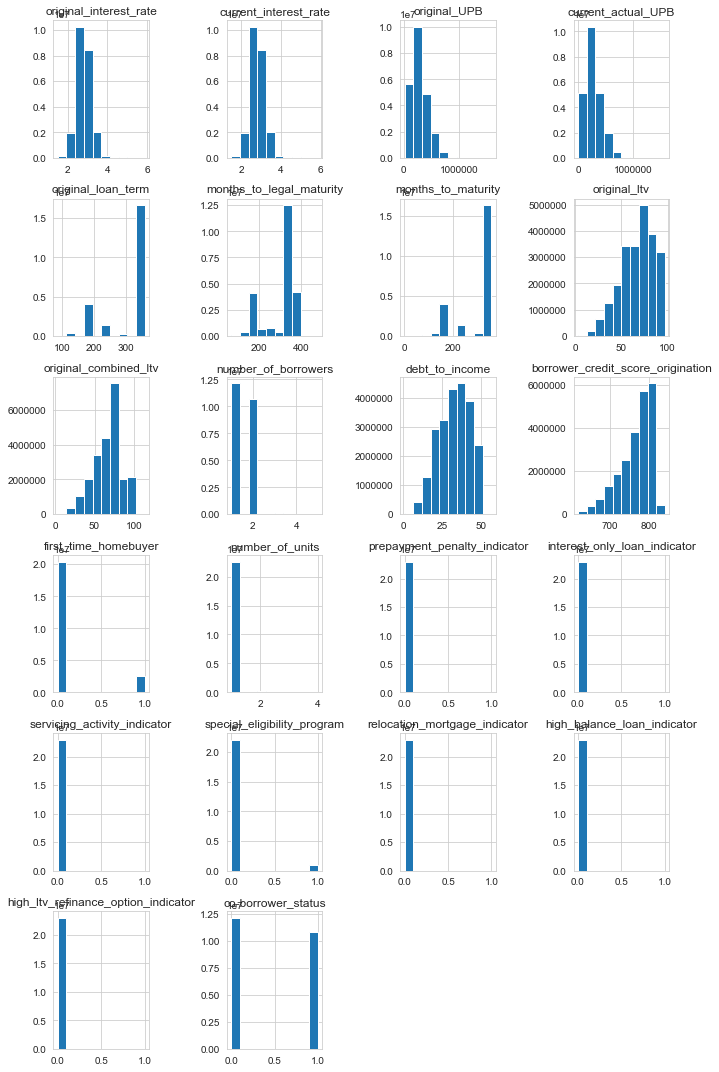

In [52]:
# Create histograms for numerical continuous variables
fig, axes = plt.subplots(nrows = 6, ncols = 4, figsize = (10,15))
fig.set_tight_layout(True)

for index, col in enumerate(numerical_cols.columns):
    ax=axes[index//4][index%4]
    ax.hist(data[col])
    
    axes.flat[-1].set_visible(False) # to remove empty subplot
    axes.flat[-2].set_visible(False) # to remove empty subplot
    
    # Set column name as title
    ax.set_title(col)

0    22833019
1      143503
Name: problem_loans, dtype: int64


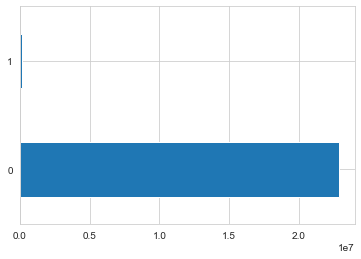

In [53]:
# Examine distribution of target variable
print(data['problem_loans'].value_counts())
data['problem_loans'].value_counts().plot(kind='barh')

- Distribution of target variable is highly unbalanced, with less than 1% of observations  
classified as a problem loan. Nonetheless, at over 140k observations, the value count of  
problem loans is large enough to train models in this analysis.

In [54]:
# Examine problem loans according to mean values of numerical continuous variables
data.groupby('problem_loans')[numerical_cols.columns].mean()

,original_interest_rate,current_interest_rate,original_UPB,current_actual_UPB,original_loan_term,months_to_legal_maturity,months_to_maturity,original_ltv,original_combined_ltv,number_of_borrowers,...,number_of_units,prepayment_penalty_indicator,interest_only_loan_indicator,servicing_activity_indicator,special_eligibility_program,relocation_mortgage_indicator,high_balance_loan_indicator,high_ltv_refinance_option_indicator,co-borrower_status,problem_loans
problem_loans,,,,,,,,,,,,,,,,,,,,,
0,2.785846,2.785846,282137.043726,275064.947474,314.580283,306.871908,304.570391,66.944032,67.222792,1.480055,...,1.024384,0.000000,0.000000,0.000000,0.039081,0.000000,0.000000,0.000000,0.472534,0.0
1,2.902765,2.902659,298616.370389,294129.480994,330.867682,322.478791,323.575055,72.800199,73.131837,1.335665,...,1.038689,0.001052,0.001052,0.001052,0.055065,0.001052,0.001052,0.001052,0.325937,1.0


- original interest rate and current interest rate values are not the same although they appear  
to have quite comparable descriptive statistics, indicating that there are currently not many differences
- current actual unpaid principal balance (UPB) appears more useful than original UPB in examining  
potential classification of problem loans. 
- As expected, original combined LTV (which accounts for original loan amount, home equity line of credit  
drawn, and outstanding principal balance of any other underlying mortgage loan) is higher for problem  
loans than performing loans
- Also expected, debt-to-income is higher and borrower credit score is lower for problem loans


In [55]:
# Original unpaid principal balance difference between problem loans and non-problem loans
print(f'{100*(294129.480994-275064.947474)/275064.947474}', '%')

6.93092074983565 %


- problem loans are associated with higher interest rates, higher unpaid principal balances, longer loan term,  
months to maturity, loan-to-values, debt-to-income, number of units, and payment delinquencies.
    - mean current unpaid principal balance is 6.9% higher for problem loans compared to non-problem loans.
- problem loans are associated with lower number of borrowers and lower credit score.

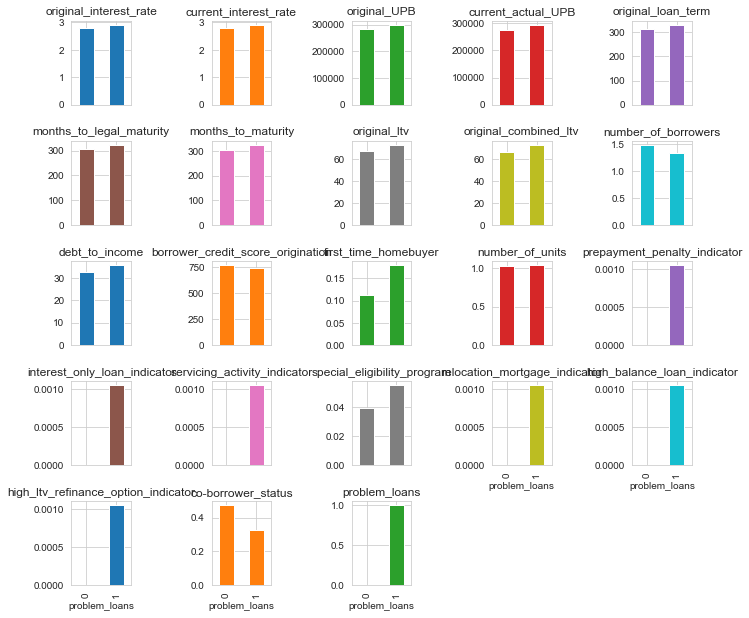

In [56]:
# Plot problem loan classication by mean numerical values
data.groupby('problem_loans')[numerical_cols.columns].mean().plot(kind='bar', 
                                                          subplots=True, 
                                                          layout=(6,5), 
                                                          figsize=(10,10),
                                                          legend=False)
plt.tight_layout()
plt.show()

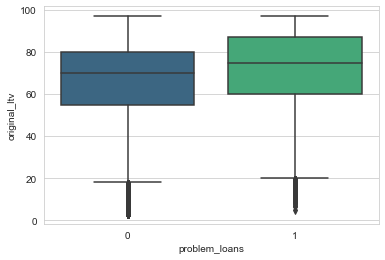

In [57]:
sns.boxplot(x=data['problem_loans'], y=data['original_ltv'], 
                notch= False, palette = 'viridis')

In [58]:
categorical_cols.columns

Index(['channel', 'seller_name', 'servicer_name', 'loan_purpose',
       'property_type', 'occupancy_status', 'amortization_type',
       'mortgage_insurance_type', 'property_valuation_method',
       'alternative_delinquency_resolution'],
      dtype='object')

In [ ]:
# Plot problem loan classication by categorical values
# fig, axes = plt.subplots(nrows = 5, ncols = 2)
# axes = axes.flatten()   
# fig.set_size_inches(10, 15)
# plt.suptitle('Counts of Categorical Variables', y=1.02)
# plt.tight_layout()

# cat_cols = categorical_cols[['channel', 'loan_purpose',
#        'property_type', 'occupancy_status', 'property_state',
#        'amortization_type', 'loan_payment_history', 'mortgage_insurance_type',
#        'property_valuation_method', 'borrower_assistance_plan', 
#         'alternative_delinquency_resolution'
#                             ]]

# for ax, col in zip(axes, cat_cols.columns):
#     sns.countplot(x=cat_cols[col], ax = ax,  data=data, palette='viridis')
#     axes.flat[-1].set_visible(False) # to remove empty subplot
#     sns.despine()

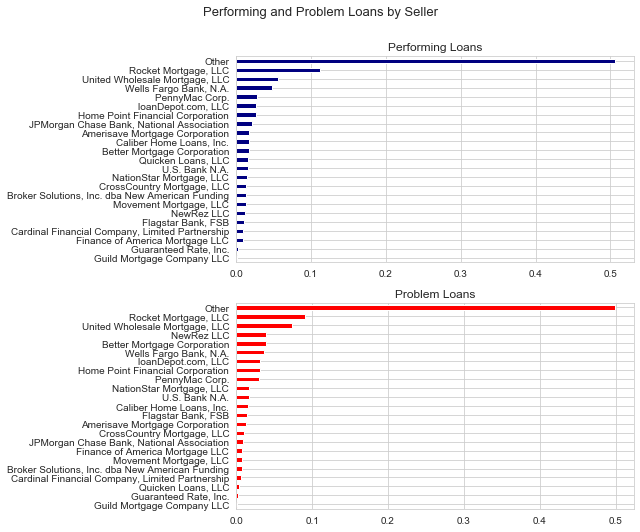

In [59]:
# Plot sellers of loans that are classified as performing loans and problem loans
# Create figure and set size
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize= (9,7))

data[(data.problem_loans == 0)]['seller_name'].value_counts(
    normalize=True, ascending=True).plot(kind='barh', color = 'navy', ax=axes[0])
axes[0].set_title('Performing Loans')

data[(data.problem_loans == 1)]['seller_name'].value_counts(
    normalize=True, ascending=True).plot(kind='barh', color = 'red', ax=axes[1])
axes[1].set_title('Problem Loans')

# Set title
fig.suptitle('Performing and Problem Loans by Seller',
             fontsize=13, y=1.05)

fig.tight_layout()

In [60]:
data.problem_loans.value_counts(dropna=False)

0    22833019
1      143503
Name: problem_loans, dtype: int64

In [61]:
# Calculate share of Rocket Mortgage loans that are classified as problem loans
data[(data.problem_loans == 1)]['seller_name'].value_counts(ascending=False).head()

Other                             71554
Rocket Mortgage, LLC              13003
United Wholesale Mortgage, LLC    10593
NewRez LLC                         5679
Better Mortgage Corporation        5653
Name: seller_name, dtype: int64

In [62]:
# Rocket mortgage problem loans / total problem loans
13003/143503

0.09061134610426264

In [63]:
# Total number of loans by seller
data.seller_name.value_counts().head()

Other                             11616027
Rocket Mortgage, LLC               2554627
United Wholesale Mortgage, LLC     1284332
Wells Fargo Bank, N.A.             1083402
PennyMac Corp.                      650200
Name: seller_name, dtype: int64

In [64]:
# Rocket mortgage loans / total loans
2554627 / 22976522

0.11118423406292736

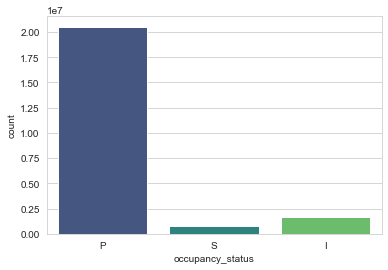

In [65]:
sns.countplot(x='occupancy_status', data=data, palette='viridis')

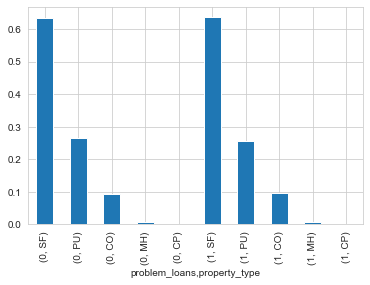

In [66]:
data.groupby('problem_loans')['property_type'].value_counts(normalize=True).plot(kind='bar')

- Majority of performing and problem loans are single-family homes, followed by planned urban developments, and condos. The share of performing and problem loans are roughly equal these property types.

In [67]:
data.groupby('problem_loans')['loan_purpose'].value_counts(normalize=True)

problem_loans  loan_purpose
0              R               0.551925
               P               0.241601
               C               0.206473
1              R               0.444980
               P               0.354034
               C               0.200985
Name: loan_purpose, dtype: float64

- Loans for purchase and cash out refinance account for higher shares of problem loans than they do  
for performing loans.

In [68]:
data.groupby('problem_loans')['first_time_homebuyer'].value_counts(normalize=True)

problem_loans  first_time_homebuyer
0              0                       0.888191
               1                       0.111809
1              0                       0.820317
               1                       0.179683
Name: first_time_homebuyer, dtype: float64

- First-time homebuyers account for a larger share of problem loans than they do for performing loans.

In [69]:
data.groupby('problem_loans')['occupancy_status'].value_counts(normalize=True)

problem_loans  occupancy_status
0              P                   0.893421
               I                   0.071307
               S                   0.035272
1              P                   0.893298
               I                   0.076207
               S                   0.030494
Name: occupancy_status, dtype: float64

- Problem loans have higher share of investment and secondary home occupancy status  
compared to performing loans.

- Higher shares of problem loans are found in states of ND, AK, VT, PR and GU.

- Most modified loans are delayed in payments, but not all. 
- Some loans that have 0 delinquent months have been modified. 
- Delayed loans are either paid or modified within the period up to 4 months delayed.

## Clustering

In [ ]:
# scores = []
# centers = list(range(1,11))
# for center in centers:
#     kmeans = KMeans(n_clusters=center)
#     model = kmeans.fit(data_subset.dropna())
#     score = np.abs(model.score(data_subset.dropna()))
#     scores.append(score)
# plt.plot(centers, scores, linestyle='--', marker='o', color='b');
# plt.xlabel('K');
# plt.ylabel('SSE');
# plt.title('SSE vs. K');

## Modelling

### Define data and apply train-test-split

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22976522 entries, 0 to 23104272
Data columns (total 34 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   channel                              object        
 1   seller_name                          object        
 2   servicer_name                        object        
 3   original_interest_rate               float64       
 4   current_interest_rate                float64       
 5   original_UPB                         float64       
 6   current_actual_UPB                   float64       
 7   original_loan_term                   int64         
 8   origination_date                     datetime64[ns]
 9   months_to_legal_maturity             float64       
 10  months_to_maturity                   float64       
 11  original_ltv                         int64         
 12  original_combined_ltv                int64         
 13  number_of_borrowers      

In [73]:
# Define subset of data
# Focus on loan characteristics
data_subset = data.drop(['seller_name', 'servicer_name',
                         'current_interest_rate', 
                        'original_UPB', 'months_to_legal_maturity',
                        'original_ltv'
                        ], axis=1)

In [74]:
data_subset.shape

(22976522, 28)

In [75]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22976522 entries, 0 to 23104272
Data columns (total 28 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   channel                              object        
 1   original_interest_rate               float64       
 2   current_actual_UPB                   float64       
 3   original_loan_term                   int64         
 4   origination_date                     datetime64[ns]
 5   months_to_maturity                   float64       
 6   original_combined_ltv                int64         
 7   number_of_borrowers                  int64         
 8   debt_to_income                       float64       
 9   borrower_credit_score_origination    float64       
 10  first_time_homebuyer                 int64         
 11  loan_purpose                         object        
 12  property_type                        object        
 13  number_of_units          

In [76]:
X = data_subset.drop(['problem_loans'], axis=1)
y = data_subset['problem_loans']

In [93]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30)

### Build column transformer for pipeline

In [94]:
# Filter for integer data types
data_subset.dtypes[data_subset.dtypes == 'int64']

original_loan_term                     int64
original_combined_ltv                  int64
number_of_borrowers                    int64
first_time_homebuyer                   int64
number_of_units                        int64
prepayment_penalty_indicator           int64
interest_only_loan_indicator           int64
servicing_activity_indicator           int64
special_eligibility_program            int64
relocation_mortgage_indicator          int64
high_balance_loan_indicator            int64
high_ltv_refinance_option_indicator    int64
co-borrower_status                     int64
problem_loans                          int64
dtype: object

In [95]:
# Filter for float data types
data_subset.dtypes[data_subset.dtypes == 'float']

original_interest_rate               float64
current_actual_UPB                   float64
months_to_maturity                   float64
debt_to_income                       float64
borrower_credit_score_origination    float64
dtype: object

In [96]:
# Filter for object data types
data_subset.dtypes[data_subset.dtypes == 'object']

channel                               object
loan_purpose                          object
property_type                         object
occupancy_status                      object
amortization_type                     object
mortgage_insurance_type               object
property_valuation_method             object
alternative_delinquency_resolution    object
dtype: object

In [97]:
data['special_eligibility_program'].value_counts()

0    22076277
1      900245
Name: special_eligibility_program, dtype: int64

In [98]:
# Define lists of numeric and categorical features

numeric_features = ['original_loan_term', 'original_combined_ltv',
                    'number_of_borrowers', 'first_time_homebuyer',
                    'number_of_units', 'prepayment_penalty_indicator',
                    'interest_only_loan_indicator', 'servicing_activity_indicator',
                    'special_eligibility_program',
                    'relocation_mortgage_indicator', 'high_balance_loan_indicator',
                    'high_ltv_refinance_option_indicator', 'co-borrower_status',
                    'original_interest_rate', 'current_actual_UPB', 
                    'months_to_maturity', 'debt_to_income', 
                    'borrower_credit_score_origination']

categorical_features = ['channel', 'loan_purpose', 'property_type', 
                        'occupancy_status', 'amortization_type', 'mortgage_insurance_type', 
                        'property_valuation_method',  
                        'alternative_delinquency_resolution']

In [99]:
# Build column transformer for scaling numerical features and one-hot-encoding  
# categorical features

# Instantiate MinMaxScaler and OneHotEncoder
numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Define preprocessor for categorical data
feature_preprocessor = ColumnTransformer(transformers=
                [('cat', categorical_transformer, categorical_features)])

# Define preprocessor for numeric and categorical data
# feature_preprocessor = ColumnTransformer(transformers=
#                 [('num', numeric_transformer, numeric_features),
#                 ('cat', categorical_transformer, categorical_features)])

# Define preprocessor for numeric data only (MinMaxScaler)
# numeric_preprocessor = ColumnTransformer(transformers=
#                         [('num', numeric_transformer, numeric_features)])

# Define preprocessor for categorical data only (ohe)
# categorical_preprocessor = ColumnTransformer(transformers=
#                      [('cat', categorical_transformer, categorical_features)])

In [100]:
# Confirm that ColumnTransformer feature_preprocessor worked
# Apply feature_preprocessor to X_train set and print shape
X_train_transformed = feature_preprocessor.fit_transform(X_train)
print(X_train_transformed.shape)

# Create df and examine
X_train_transformed = pd.DataFrame(X_train_transformed)
X_train_transformed

(16083565, 26)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16083560,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
16083561,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
16083562,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
16083563,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Define Function Evaluation Metrics

Evaluation metrics: The lender seeks to correctly i) identify problem loans (true negatives) in order to
minimize  
losses from un-repaid loans and ii) identify good, performing loans (true positives) in
order to maximize profits.

Given the need to minimize false positives and false negatives, the f1-score should be a primary evaluation  
metric. F1-score is interpreted as a harmonic mean of the precision and recall.

Model evaluation should also focus on precision, since there is a need to minimize losses from false positives.

In [101]:
# Define function for model evaluation metrics
def model_evaluation(model_pipe, X_train, y_train, X_test, y_test, model_name):

    y_pred_train = model_pipe.predict(X_train)
    y_pred_test = model_pipe.predict(X_test)

# Define evaluation metric
    fscore = f1_score(y_test, y_pred_test)*100
    prec_score = precision_score(y_test, y_pred_test)*100
    
# Classification report 
    print('----------------------------------------------------------')
    print(model_name)
    print('Classification Report: Train')
    print(classification_report(y_train, y_pred_train))
    print('----------------------------------------------------------')
    print('Classification Report: Test')
    print(classification_report(y_test, y_pred_test))
    print(f'F1 Score for Test Set: {round(fscore, 2)}%')
    print(f'Precision Score for Test Set: {round(prec_score,2)}%')
        
# Plot confusion matrix
    plot_confusion_matrix(model_pipe, 
                      X_test, 
                      y_test, 
                      cmap = 'Blues',
                     display_labels= ['Problem Loan', 'Performing Loan'],
                     #values_format= '%0.2f', 
                     normalize='true'
                     )
    plt.grid(False)
    plt.title(f'Normalized Confusion Matrix: {model_name}', y=1.05, fontsize = 13)
    plt.show()
    
# Print confusion matrix array
    print('Confusion Matrix array:')
    print(np.round(confusion_matrix(y_test, y_pred, normalize='true'), 2)*100)
    
# Plot precision-recall curve, which is useful measure of success of prediction  
# when classes are imbalanced. High precision relates to low FP rate, high  
# recall relates to low false negative rate.
    y_score = model_pipe.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    fig, ax = plt.subplots()
    ax.plot(recall, precision, marker='.', color='blue', label=model_name)
    #add axis labels
    ax.set_title(f'Precision-Recall Curve')
    ax.set_ylabel('Precision - Positive label: 1')
    ax.set_xlabel('Recall - Positive label: 1')
    ax.legend()
    #display plot of precision-recall curve
    plt.show()
    print ("Area Under Precision-Recall Curve(AP): %0.2f" 
           % average_precision_score(y_test, y_score))
    print('----------------------------------------------------------') 

## Classification Modelling

### Baseline model

In [102]:
# Define baseline Decision Stump Classifier (baseline model 1.0)
# Set random state equal to 42. Set max_depth parameter to 2.

stump_clf = DecisionTreeClassifier(random_state=42, max_depth=2)

# Build DummyClassifier model with preprocessing pipeline
stump_pipe = Pipeline(steps = [ ('preprocess', feature_preprocessor),
                        ('classifier', stump_clf)])

# Fit the DummyClassifier pipeline model to training data
stump_pipe.fit(X_train, y_train)

# Predict y on test data
y_pred = stump_pipe.predict(X_test)
                             
print(f'Training Score:', np.round(stump_pipe.score(X_train, y_train),2))
print(f'Testing Score:', np.round(stump_pipe.score(X_test, y_test),2))

Training Score: 0.99
Testing Score: 0.99


- Mean accuracy score is 99% for training and test sets, indicative of overfitting.
- Next model iterations should address class imbalance.

----------------------------------------------------------
Decision Stump Classifier
Classification Report: Train
              precision    recall  f1-score   support

           0       0.99      1.00      1.00  15982785
           1       0.00      0.00      0.00    100780

    accuracy                           0.99  16083565
   macro avg       0.50      0.50      0.50  16083565
weighted avg       0.99      0.99      0.99  16083565

----------------------------------------------------------
Classification Report: Test
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   6850234
           1       0.00      0.00      0.00     42723

    accuracy                           0.99   6892957
   macro avg       0.50      0.50      0.50   6892957
weighted avg       0.99      0.99      0.99   6892957

F1 Score for Test Set: 0.0%
Precision Score for Test Set: 0.0%


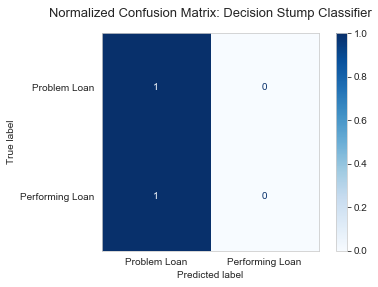

Confusion Matrix array:
[[100.   0.]
 [100.   0.]]


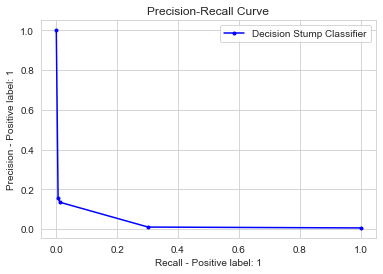

Area Under Precision-Recall Curve(AP): 0.01
----------------------------------------------------------


In [103]:
# Evaluate Decision Stump Classifier model
model_evaluation(stump_pipe, X_train, y_train, X_test, y_test, 
                 'Decision Stump Classifier')

- Baseline model is overfitting, which is explained by significant class imbalance  
where majority of observations are for performing loans (class 0). f1-score and  
precision scores for the test set are not good, indicating that the model does not  
generalize well with new data. Subsequent model iterations needs to address the  
class imbalance.

### Model iterations

In [ ]:
# Build decision tree classifier with greater max_depth than decision stump classifier
# Set random state equal to 42 for reproducibility and class weight to balanced
dt_clf = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')

# Create pipeline for Decision Tree Classifier
dt_pipe = Pipeline([('preprocessor', feature_preprocessor), 
                   ('dt', dt_clf)])

# Define model hyperparameters for GridSearch in a dictionary                            
dt_param_grid = {
     'dt__criterion': ['entropy','gini'],
     'dt__splitter': ['best', 'random'],
     'dt__max_depth': [4,6,8], #lower values avoid overfitting
     'dt__min_samples_leaf': [2, 4, 6, 8, 10] #higher values avoid overfitting
      }

# Instantiate GridSearchCV
dt_gs = GridSearchCV(dt_pipe,  #pipeline
                     dt_param_grid, #hyperparameters
                     cv=10, #number of cross-validation folds
                     n_jobs=-1,
                     return_train_score=True
                    )

# Fit model to training data    
dt_gs.fit(X_train,y_train)

print(f'Training Score:', np.round(dt_gs.score(X_train, y_train),2))
print(f'Testing Score:', np.round(dt_gs.score(X_test, y_test),2))

## Questions

- created target variable based on other variables--drop component variables?
(modification_flag, borrower_assistance_status, borrower_assistance_plan, 
foreclosure_status, loan_repayment_history)
- kernel crashing when doing grid search
- undersampling


- Github repo: link to local and git.ignore